In [33]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble

from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel

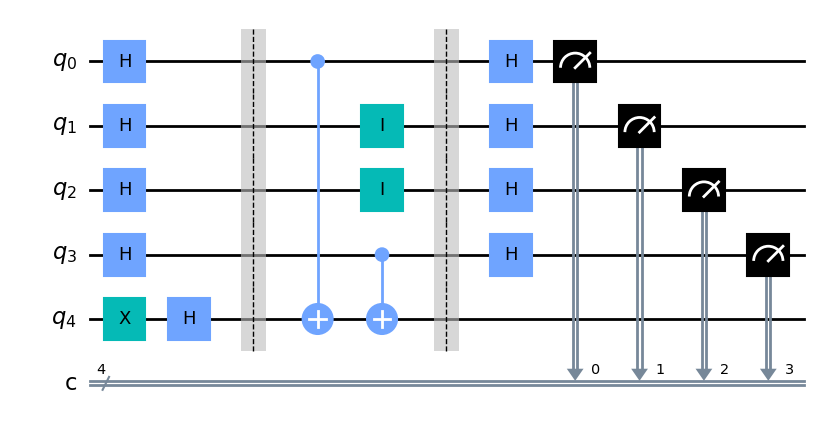

In [47]:
s = input("Enter the oracle string")
n = len(s)

bv_circuit = QuantumCircuit(n+1, n)
bv_circuit.h(range(n))
bv_circuit.x(n)
bv_circuit.h(n)
bv_circuit.barrier()

s = s[::-1]

for i in range(n):
    if s[i] == '0':
        bv_circuit.i(i)
    else:
        bv_circuit.cx(i, n)

bv_circuit.barrier()

bv_circuit.h(range(n))

bv_circuit.measure(range(n), range(n))

bv_circuit.draw('mpl')

In [35]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-12 12:16:57,825: Credentials are already in use. The existing account in the session will be replaced.


In [48]:
nairobi = provider.get_backend('ibm_nairobi')
noise_model = NoiseModel.from_backend(nairobi)

In [49]:
transpiled_circuit = transpile(bv_circuit, nairobi, optimization_level=0)


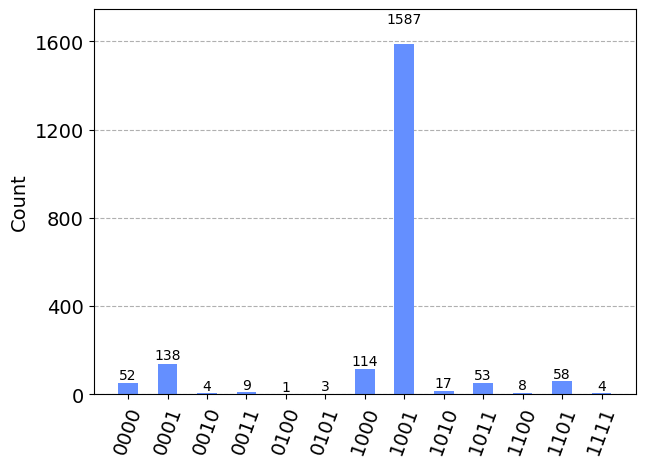

In [50]:
sim = Aer.get_backend('qasm_simulator')
assembled_circuit = assemble(transpiled_circuit, shots=2048)
sim_job = sim.run(assembled_circuit, noise_model=noise_model)
sim_results = sim_job.result()
sim_counts = sim_results.get_counts()
plot_histogram(sim_counts)